In [91]:
# Importing neccessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm
import numpy as np
from scipy.stats import iqr
from matplotlib import style
style.use('dark_background')


In [33]:
# Reading in the file
df = pd.read_csv("./supermarket_sales - Sheet1.csv")

# Data Exploration

In [34]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
print(df.shape)

(1000, 17)


In [36]:
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.220360e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [38]:
# Luckily there is no missing value so we didn't have to clean it
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

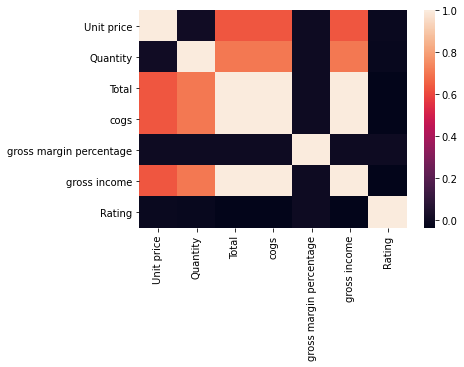

In [57]:
#correlation matrix
corrmat = df.corr()
fig , ax=plt.subplots()
sns.heatmap(corrmat)



##  Dropping uneccessary columns

In [40]:
# As Tax 5% and gross income is telling the same thing, data is totally the same, 
# so we decide to drop one of them.
df['Tax 5%'] == df['gross income']

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [41]:
df.drop(columns = 'Tax 5%', inplace = True)

In [42]:
#df.drop("gross margin percentage", inplace =True)
df = df.set_index('Invoice ID')

In [43]:
df = df.set_index('Invoice ID')

KeyError: "None of ['Invoice ID'] are in the columns"

In [15]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Adding weekday and month column

In [16]:
type(df['Date'])
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()

/Users/shutoyeung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: 'str' object has no attribute 'fit'

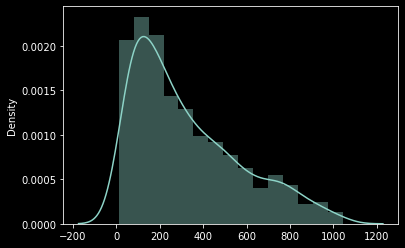

In [58]:
# Plotting the distrition of total
# We can see the plot is a little bit right-skewed and not normally distributed.
sns.distplot(df['Total'], fit = 'norm')
fig = plt.figure()
res = stats.probplot(df['Total'], plot=plt)

In [46]:
# We can see that although the total amount of January is the highest, 
# after minus the cogs, all three months also generate the profits around 15.
# Therefore, all three months create almost the same profits.
df.groupby('Month_name')[['Total','cogs']].mean()

,Total,cogs
Month_name,,
February,320.856020,305.577162
January,330.374625,314.642500
March,317.262339,302.154609


# Data Visualistion

In [47]:
# Supermarket sold fashion accessories product the most.
df.groupby('Product line')['Payment'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Payment, dtype: int64

In [48]:
# Previously we saw that January has the most total, 
# and now we can see January was selling the most product.
df['Weekday'].value_counts()
df['Month_name'].value_counts() 

January     352
March       345
February    303
Name: Month_name, dtype: int64

/Users/shutoyeung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


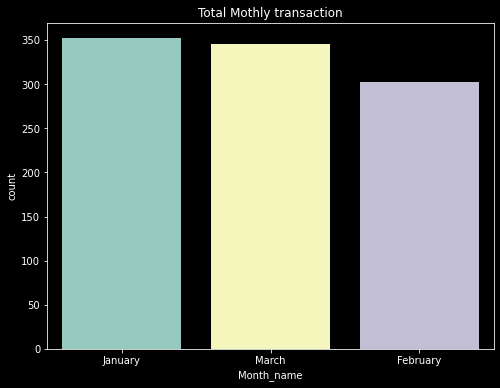

In [59]:
# Visualising the total of monthly transactions
plt.figure(figsize=(8, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Month_name'])

/Users/shutoyeung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


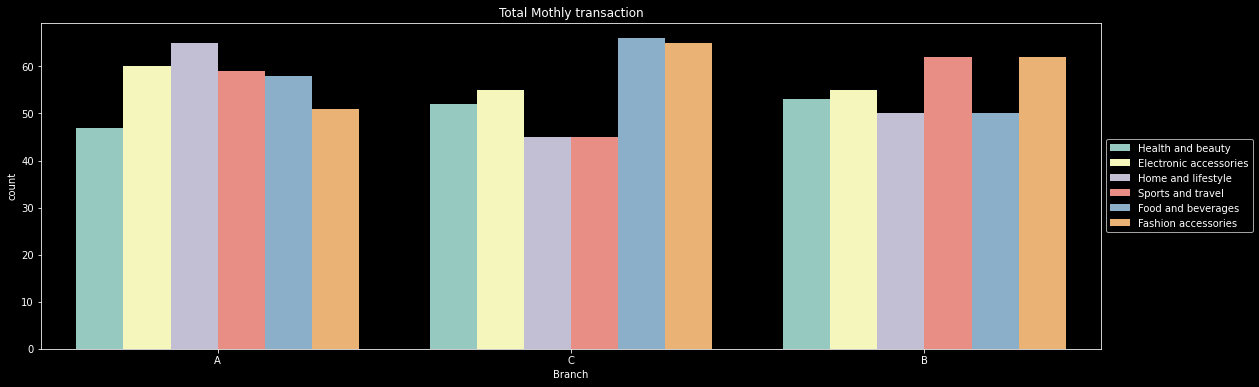

In [103]:
# There are three branch of supercenter and there are different characteristics of the branches
# Branch A: Home and lifestyle is the most sellable products 
#           and health and beauty products sold the least
# Branch B: Food and beverages & Fashion products sell the most. 
#           Sports and travel & Home and lifestyle sell the least
# Branch C: Sports and travel & Fashion products sell the most.
#           Home and lifestyle & food and beverages sell the least.
plt.figure(figsize=(19, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Branch'], hue = df['Product line'])
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
style.use('dark_background')

In [104]:
gender = pd.get_dummies(df, columns=['Gender'], drop_first=True)

/Users/shutoyeung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


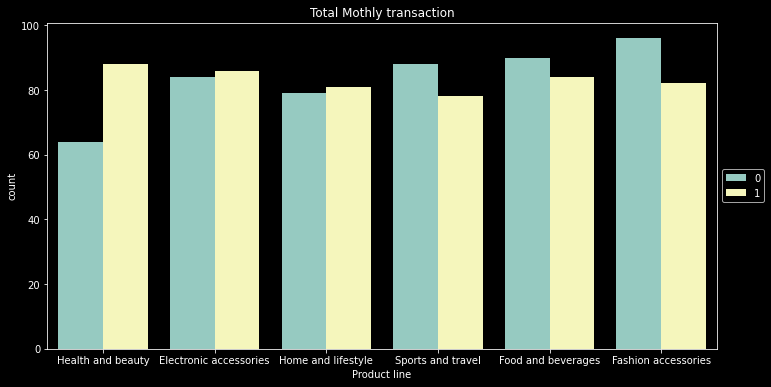

In [105]:
# 0 represents female and 1 represents male
# Female bought more products at sports and travel, food and beverages & Fashion.
# This is kind of make sense because female usually prepare the meals for dinner 
# and love pursuing the fast fashion.
# Male bought a lot more health and beauty product because male maybe focus more on sport, 
# eating more supplement.
# There are not too much difference between electronic accessories & home and lifestyle.
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(gender['Product line'], hue = gender.Gender_Male)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Outlier Analysis

<AxesSubplot:>

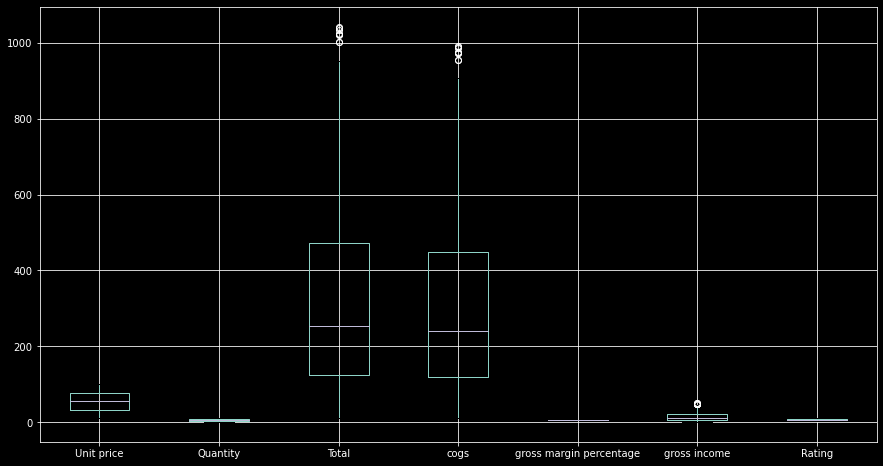

In [65]:
df.boxplot(figsize=(15, 8))


In [68]:
# Getting IQR and outliers of total
iqr_t = iqr(df['Total'])
lower_threshold_t = np.quantile(df['Total'],0.25) -1.5*iqr_t
upper_threshold_t = np.quantile(df['Total'],0.75) +1.5*iqr_t
outliers_t = df[(df['Total'] < lower_threshold_t) | (df['Total'] > upper_threshold_t)] 
  

In [69]:
# Getting IQR and outliers of COGS
iqr_c = iqr(df['cogs'])
lower_threshold_c = np.quantile(df['cogs'],0.25) -1.5*iqr_c
upper_threshold_c = np.quantile(df['cogs'],0.75) +1.5*iqr_c
outliers_c = df[(df['cogs'] < lower_threshold_c) | (df['cogs'] > upper_threshold_c)] 

# Remove Outliers

In [76]:
outliers_t['Total'].values

array([1003.59 , 1039.29 , 1042.65 , 1002.12 , 1020.705, 1034.46 ,
       1023.75 , 1022.385, 1022.49 ])

In [77]:
outliers_c['cogs'].values

array([955.8, 989.8, 993. , 954.4, 972.1, 985.2, 975. , 973.7, 973.8])

In [79]:
# Checking if the outliers can found in both outliers table
# We can see that all the outliers happpen in the exact same invoice ID
outliers_t == outliers_c

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Month_name
Invoice ID,,,,,,,,,,,,,,,,,
234-65-2137,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
687-47-8271,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
860-79-0874,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
554-42-2417,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
271-88-8734,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
283-26-5248,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
751-41-9720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
744-16-7898,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
303-96-2227,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [87]:
bad_df = outliers_t.index

In [90]:
# Dropping the bad dataframe having the outliers in our original dataframe
df.drop(bad_df , axis = 0)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Month_name
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9,Monday,February
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February
